In [1]:
#Importing libraries

import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# visulaisation
from matplotlib.pyplot import xticks

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
%matplotlib inline
import statsmodels.api as sm



### Loading Dataset

In [2]:
leads= pd.read_csv('Leads.csv', encoding=' ISO-8859-1')

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Deleting the columns 'Prospect ID' as it will not have any effect in the predicting model
leads = leads.drop('Prospect ID', axis=1)

In [7]:
leads.shape

(9240, 36)

In [8]:
# check the null values percentage in each column
round(leads.isnull().sum()/len(leads)*100,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [9]:
# Will impute the column Lead Quality as it looks significant as per the description.
leads['Lead Quality'].mode()


0    Might be
Name: Lead Quality, dtype: object

In [10]:
leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [12]:
leads['Lead Quality'].isnull().sum() 

4767

In [13]:
# Replacing null values with 'Might be' as it is most frequent 
leads['Lead Quality'] = leads['Lead Quality'].replace(np.nan, 'Might  be')

In [14]:
leads['Lead Quality'].isnull().sum() 

0

In [15]:
leads['Lead Quality'].value_counts()

Might  be            4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [16]:
# Dropping columns with more than 40% of missing values.
leads.drop(leads.loc[:,list(round((leads.isnull().sum()/len(leads.index)*100),2)>40)].columns,axis =1, inplace = True)

In [17]:
# check the null values percentage in each column again
round(leads.isnull().sum()/len(leads)*100,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [18]:
leads.shape

(9240, 32)

In [19]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Interested in other courses,Low in Relevance,No,No,Select,Select,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,Ringing,Might be,No,No,Select,Select,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified


In [20]:
# Need to replace "select" from columns Specialization, How did you hear about X Education, Lead Profile, and City to NAN as it is equlant to null values.
leads = leads.replace('Select', np.nan)

In [21]:
round(leads.isnull().sum()/len(leads)*100,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [22]:
# Handling City variable
leads.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

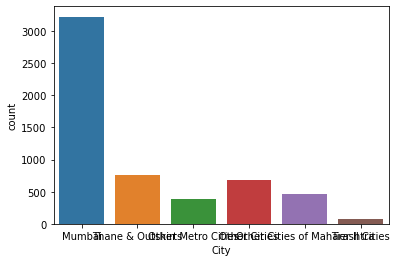

In [23]:
sns.countplot(leads.City)
plt.show()

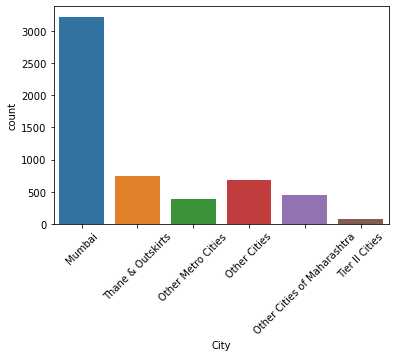

In [24]:
sns.countplot(leads.City)
xticks(rotation = 45)
plt.show()

In [25]:
leads.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [26]:
# Impute Mumbai for nan values as it is most frequent in the city column
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

In [27]:
leads.City.value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [28]:
round(leads.isnull().sum()/len(leads)*100,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [29]:
# Drop lead Profile which has more missing values.
leads.drop(["Lead Profile"],axis=1,inplace=True)

In [30]:
round(leads.isnull().sum()/len(leads)*100,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [31]:
#Handling Specialization column
leads.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [32]:
#It is possible that the person does not have a specialization or his/her specialization is not in the options. We can create a new column for that.
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

In [33]:
round(leads.isnull().sum()/len(leads)*100,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [34]:
# Dropping column "How did you hear about X Education" as it has no significant data. 78% missing values.
leads.drop(["How did you hear about X Education"],axis=1,inplace=True)

In [35]:
leads.shape

(9240, 30)

In [36]:
round(leads.isnull().sum()/len(leads)*100,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [37]:
# Function for percentage plots
def percent_plot(var):
    values = (leads[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')

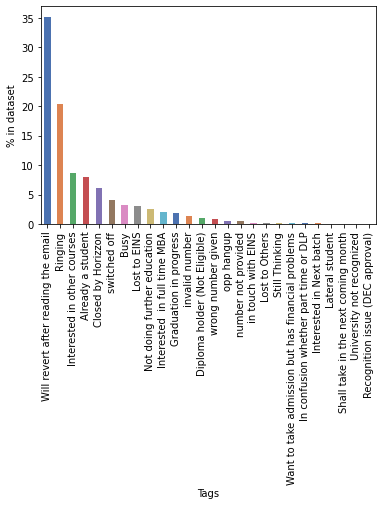

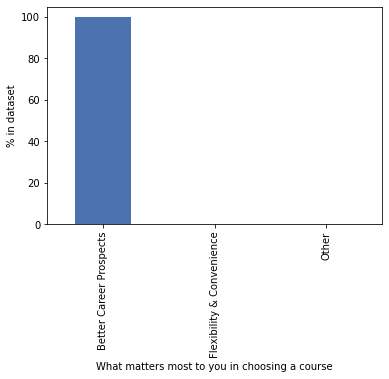

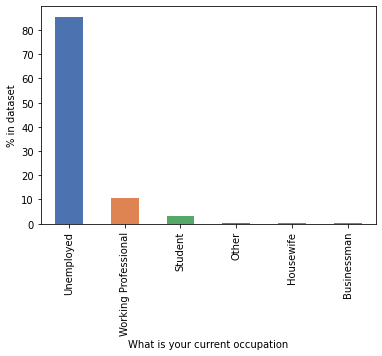

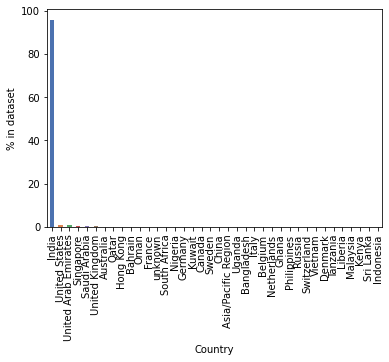

In [38]:
# For 'Tags', 'What matters most to you in choosing a course', 'What is your current occupation' and 'Country'
var_list = ['Tags', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country']

for var in var_list:
    percent_plot(var)
    plt.show()

In [39]:
# To impute with the most frequent value
for var in var_list:
    top_frequent = leads[var].describe()['top']
    leads[var] = leads[var].replace(np.nan, top_frequent)

In [40]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [41]:
# Checking Lead source column
leads["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [42]:
 #'Google' and 'google' both are same, need to Modify 'google' to 'Google'

leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

In [43]:
leads["Lead Source"].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [44]:
# drop the rows containing missing values
leads.dropna(inplace = True)

In [45]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

### Handling outliers

In [46]:
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
99%,659563.350000,1.000000,17.000000,1839.000000,9.000000


In [47]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(numeric_variables)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


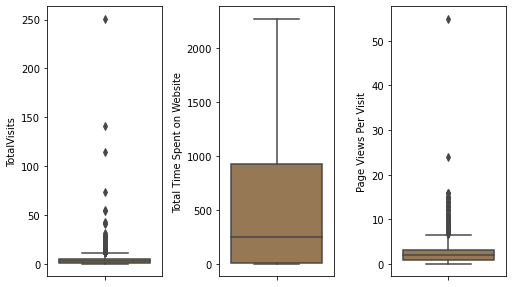

In [48]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=leads)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables) 

In [49]:
## Removing outlier values based on the Interquartile distance for some of the continuous variable
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

leads.shape

(8445, 30)

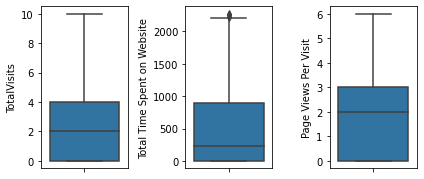

In [50]:
#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(10,5))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,data=leads)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)  

In [51]:
##Converting some binary variables (Yes/No) to 0/1
# List of variables to map

varlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,No,Ringing,Might be,No,No,Mumbai,No,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,No,Will revert after reading the email,Might be,No,No,Mumbai,No,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,No,Ringing,Not Sure,No,No,Mumbai,No,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,No,Will revert after reading the email,Might be,No,No,Mumbai,No,0,Modified


In [52]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(leads[['Country', 'Lead Source','Lead Origin','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)
leads.shape

(8445, 104)

In [53]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Quality','Tags',
                    'Lead Origin','What is your current occupation', 'Specialization', 'City','Last Activity', 'Country', 
                    'Lead Source','Last Notable Activity'], 1)
leads.shape

(8445, 94)

In [54]:
leads.shape

(8445, 94)

In [55]:
### Checking the conversion rate by using target variable "converted"
(sum(leads['Converted'])/len(leads['Converted'].index))*100

37.47779751332149

### 37% of the leads are converted.


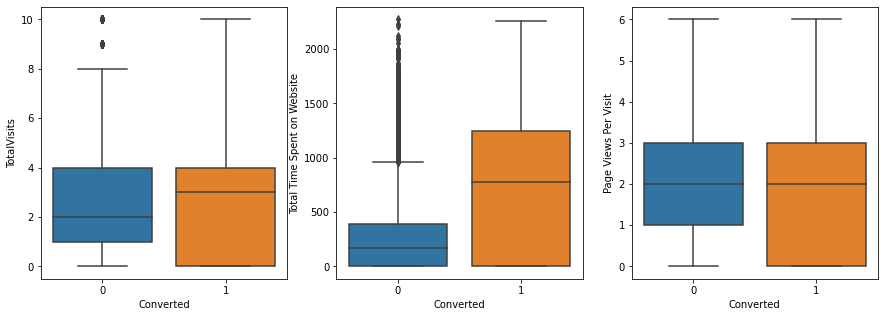

In [56]:
# To plot numerical variables against target variable to analyse relations
plt.figure(figsize=(15, 5))
for var in numeric_variables:
    plt.subplot(1,3,numeric_variables.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = leads)
plt.show()

In [57]:
## Observations:

#'TotalVisits' has same median values for both outputs of leads. No conclusion can be drwan from this.
# People spending more time on the website are more likely to be converted. This is also aligned with our general knowledge.
#'Page Views Per Visit' also has same median values for both outputs of leads. Hence, inconclusive.

In [58]:
# Categorical variables
catvar = list(leads.columns[leads.dtypes == 'object'])
catvar

['What matters most to you in choosing a course',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [61]:
# Functions to plot countplots for categorical variables with target variable

# For single plot
def plot_cat_var(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x = var, hue = "Converted", data = leads)
    plt.xticks(rotation = 90)
    plt.show()

# For multiple plots    
def plot_cat_vars(lst):
    l = int(len(lst)/2)
    plt.figure(figsize=(20, l*7))
    for var in lst:
        plt.subplot(l,2,lst.index(var)+1)
        sns.countplot(x = var, hue = "Converted", data = leads)
        plt.xticks(rotation = 90)
    plt.show()

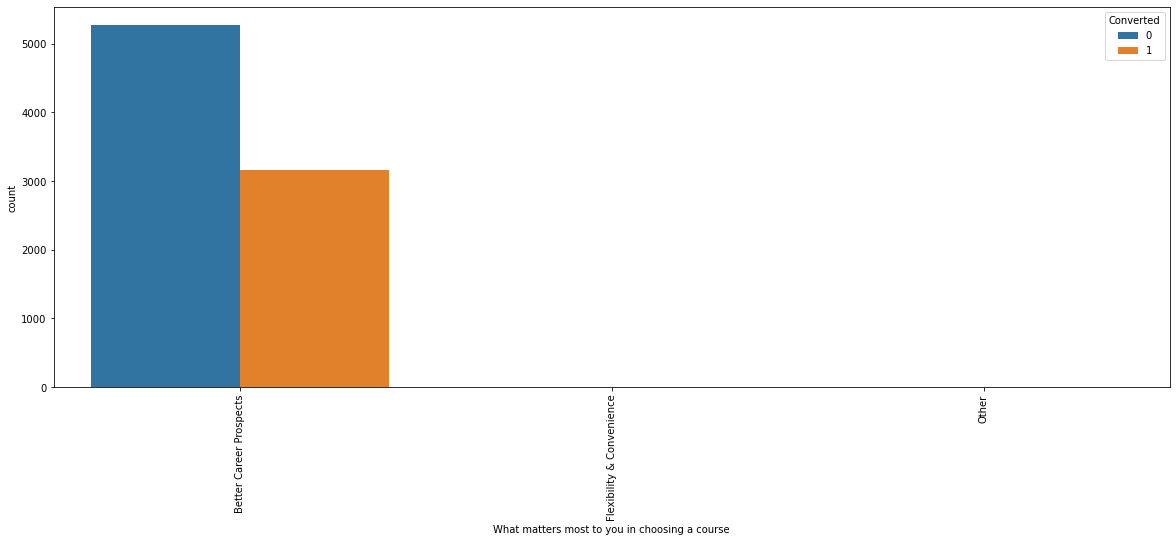

In [62]:
plot_cat_var(catvar[0])

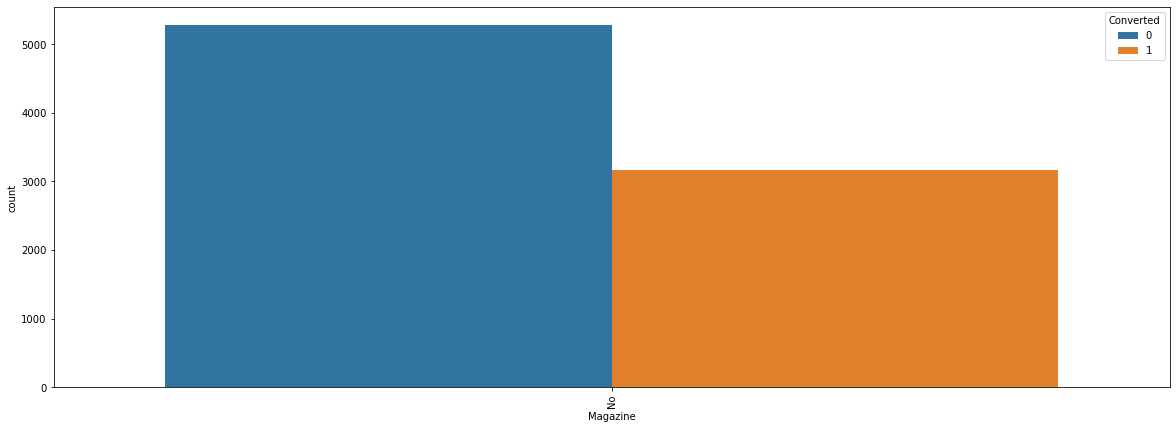

In [67]:
plot_cat_var(catvar[1])

In [69]:
leads.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.0,8445.0,...,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000
mean,617000.027472,0.076969,0.000237,0.374778,2.754174,468.572054,2.071957,0.000710,0.0,0.0,...,0.000118,0.001184,0.368028,0.020485,0.028182,0.000118,0.237892,0.003552,0.005092,0.000118
std,23289.142312,0.266557,0.015388,0.484094,2.330357,541.698874,1.649040,0.026647,0.0,0.0,...,0.010882,0.034393,0.482298,0.141662,0.165503,0.010882,0.425818,0.059500,0.071179,0.010882
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596376.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615473.000000,0.000000,0.000000,0.000000,2.000000,233.000000,2.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637048.000000,0.000000,0.000000,1.000000,4.000000,886.000000,3.000000,0.000000,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,660737.000000,1.000000,1.000000,1.000000,10.000000,2272.000000,6.000000,1.000000,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 94 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Lead Number                                         8445 non-null   int64  
 1   Do Not Email                                        8445 non-null   int64  
 2   Do Not Call                                         8445 non-null   int64  
 3   Converted                                           8445 non-null   int64  
 4   TotalVisits                                         8445 non-null   float64
 5   Total Time Spent on Website                         8445 non-null   int64  
 6   Page Views Per Visit                                8445 non-null   float64
 7   What matters most to you in choosing a course       8445 non-null   object 
 8   Search                                              8445 non-null   int64  
 9

In [132]:
leads =leads.drop(['Magazine'],axis=1)

## Train-Test Split

In [152]:
# Importing required package
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [153]:
X =leads.drop(['Converted'],axis=1)
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [154]:
leads.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [155]:
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [156]:
# To split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [157]:
### Feature Scaling
scaler = StandardScaler()

In [158]:
numeric_variables

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [159]:
#Applying scaler to all numerical columns
X_train[numeric_variables] = scaler.fit_transform(X_train[numeric_variables])
X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5279,609296,1,0,-0.314975,-0.504462,-0.037025,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3099,630158,0,0,-0.314975,-0.480383,-0.037025,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
91,659607,0,0,1.396648,1.279233,-0.340229,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1577,643838,0,0,-1.170787,-0.865647,-1.249840,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
487,655227,0,0,-0.314975,-0.617448,-0.037025,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building the Model

In [160]:
## Feature Selection using RFE
# To create an instance of Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [162]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [163]:
# To check output of RFE
rfe.support_

array([ True,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True, False,  True, False, False, False])

In [164]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 27),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 54),
 ('Newspaper Article', False, 58),
 ('X Education Forums', False, 63),
 ('Newspaper', False, 47),
 ('Digital Advertisement', False, 56),
 ('Through Recommendations', False, 30),
 ('A free copy of Mastering The Interview', True, 1),
 ('Country_Australia', False, 10),
 ('Country_Bahrain', False, 14),
 ('Country_Bangladesh', False, 33),
 ('Country_Belgium', False, 25),
 ('Country_Canada', False, 24),
 ('Country_China', False, 35),
 ('Country_Denmark', False, 57),
 ('Country_France', False, 22),
 ('Country_Germany', False, 29),
 ('Country_Ghana', False, 52),
 ('Country_Hong Kong', False, 16),
 ('Country_India', True, 1),
 ('Country_Indonesia', False, 64),
 ('Country_Italy', False, 43),
 ('Country_Kenya', False, 60),
 ('Country_Kuwait', False, 21),
 ('Country_Liberia', False, 40),

In [165]:
# Features selected
col = X_train.columns[rfe.support_]
col

Index(['Lead Number', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Country_India',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [166]:
# Features eliminated
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Country_Australia', 'Country_Bahrain', 'Country_Bangladesh',
       'Country_Belgium', 'Country_Canada', 'Country_China', 'Country_Denmark',
       'Country_France', 'Country_Germany', 'Country_Ghana',
       'Country_Hong Kong', 'Country_Indonesia', 'Country_Italy',
       'Country_Kenya', 'Country_Kuwait', 'Country_Liberia',
       'Country_Malaysia', 'Country_Netherlands', 'Country_Nigeria',
       'Country_Oman', 'Country_Philippines', 'Country_Qatar',
       'Country_Russia', 'Country_Saudi Arabia', 'Country_Singapore',
       'Country_South Africa', 'Country_Sri Lanka', 'Country_Sweden',
       'Country_Switzerland', 'Country_Tanzania', 'Country_Uganda',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States', 'Country_Vietnam', 'Country_unknown',
       'Lead Source_Facebook', 'Lead Sour

In [167]:
## Assessing the Model with StatsModels
import statsmodels.api as sm

# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model  
    return X_sm, logm

In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X_in):
    X = X_in.drop('const',1)    # As we don't need constant
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [169]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [170]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [171]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

In [172]:
# Model 1
X1, logm1 = build_model(X_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5890
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.3
Date:                Tue, 24 Jan 2023   Deviance:                       5286.6
Time:                        22:02:31   Pearson chi2:                 6.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3487
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [173]:
# "A free copy of Mastering The Interview"  has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

In [174]:
#Model 2
col1 = col.drop('A free copy of Mastering The Interview',1)

In [175]:
# To rebuild the model
X2, logm2 = build_model(X_train[col1],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5891
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.3
Date:                Tue, 24 Jan 2023   Deviance:                       5286.6
Time:                        22:05:15   Pearson chi2:                 6.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3487
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [176]:
# "Lead Origin_Landing Page Submission"  has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.


In [177]:
col2 = col1.drop('Lead Origin_Landing Page Submission',1)

In [178]:
# Model 3
# To rebuild the model
X3, logm3 = build_model(X_train[col2],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5892
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.3
Date:                Tue, 24 Jan 2023   Deviance:                       5286.6
Time:                        22:06:42   Pearson chi2:                 6.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3487
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [179]:
# "Country_India"  has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.
col3 = col2.drop('Country_India',1)

In [180]:
# Model 4
X4, logm4 = build_model(X_train[col3],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5893
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.4
Date:                Tue, 24 Jan 2023   Deviance:                       5286.8
Time:                        22:08:22   Pearson chi2:                 6.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3487
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [181]:
# Model 5
col4 = col3.drop('Lead Source_Organic Search',1)
X5, logm5 = build_model(X_train[col4],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5894
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.8
Date:                Tue, 24 Jan 2023   Deviance:                       5287.6
Time:                        22:09:42   Pearson chi2:                 6.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3486
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [182]:
# Model 6
col5 = col4.drop('Last Notable Activity_SMS Sent',1)
X6, logm6 = build_model(X_train[col5],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5895
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2644.4
Date:                Tue, 24 Jan 2023   Deviance:                       5288.8
Time:                        22:10:44   Pearson chi2:                 6.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3485
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [183]:
check_VIF(X6)

,Features,VIF
9,Lead Origin_Lead Add Form,68.23
7,Lead Source_Reference,54.75
8,Lead Source_Welingak Website,14.02
0,Lead Number,6.64
4,Page Views Per Visit,3.20
6,Lead Source_Olark Chat,3.16
2,TotalVisits,2.78
12,Last Notable Activity_Modified,2.71
11,Last Notable Activity_Email Opened,2.33
5,Lead Source_Direct Traffic,1.66


In [184]:
# Model 7
col6 = col5.drop('Lead Origin_Lead Add Form',1)
X7, logm7 = build_model(X_train[col6],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5896
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.6
Date:                Tue, 24 Jan 2023   Deviance:                       5293.2
Time:                        22:12:48   Pearson chi2:                 6.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3480
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [185]:
check_VIF(X7)

,Features,VIF
0,Lead Number,6.62
4,Page Views Per Visit,3.20
6,Lead Source_Olark Chat,3.15
2,TotalVisits,2.77
11,Last Notable Activity_Modified,2.71
10,Last Notable Activity_Email Opened,2.33
5,Lead Source_Direct Traffic,1.66
7,Lead Source_Reference,1.59
3,Total Time Spent on Website,1.33
13,Last Notable Activity_Page Visited on Website,1.16


In [186]:
# Model 8
col7 = col6.drop('Lead Number',1)
X8, logm8 = build_model(X_train[col7],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5897
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.1
Date:                Tue, 24 Jan 2023   Deviance:                       5322.3
Time:                        22:13:46   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3448
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [187]:
check_VIF(X8)

,Features,VIF
3,Page Views Per Visit,3.01
1,TotalVisits,2.75
5,Lead Source_Olark Chat,2.40
10,Last Notable Activity_Modified,1.49
9,Last Notable Activity_Email Opened,1.42
4,Lead Source_Direct Traffic,1.41
2,Total Time Spent on Website,1.28
6,Lead Source_Reference,1.27
0,Do Not Email,1.12
12,Last Notable Activity_Page Visited on Website,1.09


<AxesSubplot:>

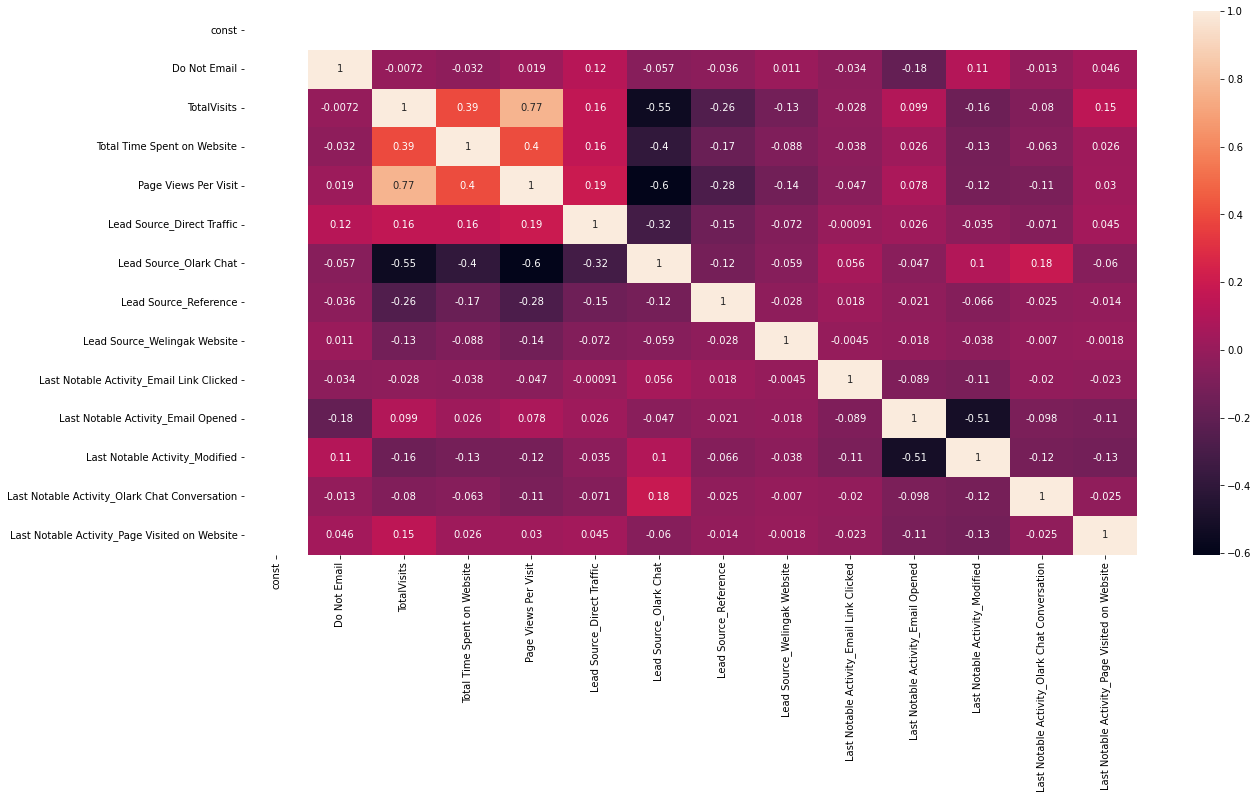

In [188]:
# To plot correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X8.corr(),annot = True)

In [189]:
## From VIF values and heat maps, we can see that there is not much multicollinearity present. All variables have a good value of VIF. These features seem important from the business aspect as well. So we need not drop any more variables and we can proceed with making predictions using this model only.

In [190]:
# To get predicted values on train set
y_train_pred_final = get_pred(X8,logm8)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.015696,5279,0
1,0,0.388064,3099,0
2,1,0.840964,91,1
3,1,0.912137,1577,1
4,0,0.158584,487,0


In [191]:
# Confusion Matrix and accuracy
confusion = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3249  445]
 [ 756 1461]]
Training Accuracy:  0.7968194890881407


In [193]:
#This is our final model:

#All p-values are very close to zero.
#VIFs for all features are very low. There is hardly any multicollinearity present.
#Training accuracy around 80% at a probability is  good.

In [194]:
other_metrics(confusion)

Sensitivity:  0.6589986468200271
Specificity:  0.8795343800757985
False postive rate - predicting the lead conversion when the lead does not convert:  0.1204656199242014
Positive predictive value:  0.7665267576075551
Negative predictive value:  0.8112359550561797


## Plotting the ROC Curve


In [197]:
#n ROC curve demonstrates several things:

#It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
#The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
#The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [198]:
# Function to plot ROC
def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [199]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

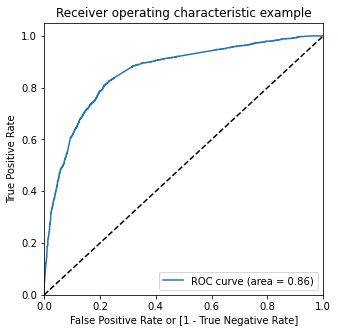

In [200]:
# To plot ROC
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [201]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

Area under curve:  0.8597517851303568


In [202]:
#Area under curve (auc) is approximately 0.86 which is close to ideal auc of 1.

In [203]:
# Finding Optimal Cutoff Point
# To create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.015696,5279,0,1,0,0,0,0,0,0,0,0,0
1,0,0.388064,3099,0,1,1,1,1,0,0,0,0,0,0
2,1,0.840964,91,1,1,1,1,1,1,1,1,1,1,0
3,1,0.912137,1577,1,1,1,1,1,1,1,1,1,1,1
4,0,0.158584,487,0,1,1,0,0,0,0,0,0,0,0


In [204]:
# To calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375063  1.000000  0.000000
0.1   0.1  0.516664  0.972485  0.243097
0.2   0.2  0.734055  0.896707  0.636437
0.3   0.3  0.790222  0.817321  0.773958
0.4   0.4  0.794959  0.743347  0.825934
0.5   0.5  0.796819  0.658999  0.879534
0.6   0.6  0.776011  0.529995  0.923660
0.7   0.7  0.761969  0.451962  0.948024
0.8   0.8  0.737269  0.352729  0.968056
0.9   0.9  0.690408  0.196211  0.987006


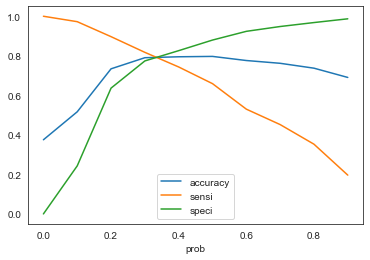

In [205]:
# To plot accuracy, sensitivity and specificity for various probabilities
sns.set_style('white')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [206]:
# From the curve above, 0.3 is the optimum point to take as a cutoff probability.

In [207]:
# Using 0.3 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.015696,5279,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.388064,3099,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.840964,91,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.912137,1577,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.158584,487,0,1,1,0,0,0,0,0,0,0,0,0


In [208]:
# Confusion matrix and Overall Accuracy
confusion2 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3051  643]
 [ 569 1648]]
Training Accuracy:  0.7949585518524784


In [209]:
# Other metrics
other_metrics(confusion2)

Sensitivity:  0.7433468651330627
Specificity:  0.8259339469409854
False postive rate - predicting the lead conversion when the lead does not convert:  0.17406605305901462
Positive predictive value:  0.7193365342645133
Negative predictive value:  0.842817679558011


In [210]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      3694
           1       0.72      0.74      0.73      2217

    accuracy                           0.79      5911
   macro avg       0.78      0.78      0.78      5911
weighted avg       0.80      0.79      0.80      5911



In [212]:
#Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7665267576075551

In [213]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6589986468200271

In [214]:
from sklearn.metrics import precision_score, recall_score

In [215]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7665267576075551

In [216]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6589986468200271

In [217]:
from sklearn.metrics import precision_recall_curve

In [218]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

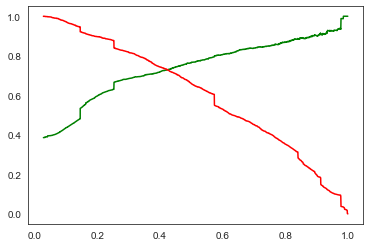

In [219]:
# To plot precision vs recall for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [220]:
# From the curve above, 0.4 is the optimum point to take as a cutoff probability using Precision-Recall. We can check our accuracy using this cutoff too.

In [221]:
# Using 0.25 threshold for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.015696,5279,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.388064,3099,0,1,1,1,1,0,0,0,0,0,0,0,0
2,1,0.840964,91,1,1,1,1,1,1,1,1,1,1,0,1,1
3,1,0.912137,1577,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.158584,487,0,1,1,0,0,0,0,0,0,0,0,0,0


In [222]:
# Confusion matrix and overall accuracy
confusion3 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[3051  643]
 [ 569 1648]]
Training Accuracy:  0.7949585518524784


In [223]:
# Other metrics
other_metrics(confusion3)

Sensitivity:  0.7433468651330627
Specificity:  0.8259339469409854
False postive rate - predicting the lead conversion when the lead does not convert:  0.17406605305901462
Positive predictive value:  0.7193365342645133
Negative predictive value:  0.842817679558011


### Predictions on the Test Set

In [226]:
# Feature transform on Test set
X_test[numeric_variables] = scaler.fit_transform(X_test[numeric_variables])
X_test.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1926,641025,0,0,-1.208529,-0.863745,-1.272379,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5654,606606,0,0,-1.208529,-0.863745,-1.272379,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1209,647084,0,0,-0.344173,-0.484469,-0.059080,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5234,609618,0,0,-0.344173,-0.090536,-0.059080,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8497,584840,0,0,-0.344173,-0.478973,-0.059080,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [228]:
# To get final features
X_test_sm = X_test[col7]

In [229]:
# To add a constant
X_test_sm = sm.add_constant(X_test_sm)

In [230]:
# Making predictions
y_test_pred = logm8.predict(X_test_sm)

y_test_pred[:10]

1926    0.252613
5654    0.145452
1209    0.137161
5234    0.196068
8497    0.074530
1918    0.130219
7405    0.352613
6561    0.033414
5492    0.840923
7851    0.529094
dtype: float64

In [231]:
# To convert y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
1926,0.252613
5654,0.145452
1209,0.137161
5234,0.196068
8497,0.074530


In [232]:
# To convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [233]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [234]:
# To remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [235]:
# To append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Lead ID,0
0,1,1926,0.252613
1,0,5654,0.145452
2,0,1209,0.137161
3,0,5234,0.196068
4,0,8497,0.074530


In [236]:
# To Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,1,1926,0.252613
1,0,5654,0.145452
2,0,1209,0.137161
3,0,5234,0.196068
4,0,8497,0.074530


In [237]:
# To put the threshold of 0.3 as derived
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,1,1926,0.252613,0
1,0,5654,0.145452,0
2,0,1209,0.137161,0
3,0,5234,0.196068,0
4,0,8497,0.074530,0


In [238]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob))

Area under curve:  0.8688823886219612


In [239]:

# Confusion matrix and overall accuracy
confusion_test = conf_mat(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1230  356]
 [ 161  787]]
Training Accuracy:  0.7959747434885557


In [240]:
# Other metrics
other_metrics(confusion_test)

Sensitivity:  0.830168776371308
Specificity:  0.7755359394703657
False postive rate - predicting the lead conversion when the lead does not convert:  0.2244640605296343
Positive predictive value:  0.6885389326334208
Negative predictive value:  0.884255930984903


In [241]:
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1586
           1       0.69      0.83      0.75       948

    accuracy                           0.80      2534
   macro avg       0.79      0.80      0.79      2534
weighted avg       0.81      0.80      0.80      2534



In [244]:
# To display features with corrsponding coefficients in final model
pd.options.display.float_format = '{:.2f}'.format
new_params = logm4.params[1:]
new_params

Lead Number                                      0.00
Do Not Email                                    -1.48
TotalVisits                                      0.25
Total Time Spent on Website                      1.09
Page Views Per Visit                            -0.21
Lead Source_Direct Traffic                      -0.27
Lead Source_Olark Chat                           0.86
Lead Source_Organic Search                      -0.11
Lead Source_Reference                            2.39
Lead Source_Welingak Website                     4.37
Lead Origin_Lead Add Form                        1.87
Last Notable Activity_Email Link Clicked        -1.73
Last Notable Activity_Email Opened              -1.16
Last Notable Activity_Modified                  -1.86
Last Notable Activity_Olark Chat Conversation   -3.18
Last Notable Activity_Page Visited on Website   -1.74
Last Notable Activity_SMS Sent                   0.32
dtype: float64

In [245]:
# Relative feature importance
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Number                                       0.00
Do Not Email                                    -33.94
TotalVisits                                       5.74
Total Time Spent on Website                      24.91
Page Views Per Visit                             -4.88
Lead Source_Direct Traffic                       -6.13
Lead Source_Olark Chat                           19.74
Lead Source_Organic Search                       -2.51
Lead Source_Reference                            54.64
Lead Source_Welingak Website                    100.00
Lead Origin_Lead Add Form                        42.72
Last Notable Activity_Email Link Clicked        -39.56
Last Notable Activity_Email Opened              -26.51
Last Notable Activity_Modified                  -42.44
Last Notable Activity_Olark Chat Conversation   -72.72
Last Notable Activity_Page Visited on Website   -39.88
Last Notable Activity_SMS Sent                    7.31
dtype: float64

In [246]:
# To sort features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Number                                      14
Do Not Email                                     13
TotalVisits                                      15
Total Time Spent on Website                      11
Page Views Per Visit                              1
Lead Source_Direct Traffic                       12
Lead Source_Olark Chat                            5
Lead Source_Organic Search                        4
Lead Source_Reference                             7
Lead Source_Welingak Website                      0
Lead Origin_Lead Add Form                         2
Last Notable Activity_Email Link Clicked         16
Last Notable Activity_Email Opened                6
Last Notable Activity_Modified                    3
Last Notable Activity_Olark Chat Conversation    10
Last Notable Activity_Page Visited on Website     8
Last Notable Activity_SMS Sent                    9
dtype: int64

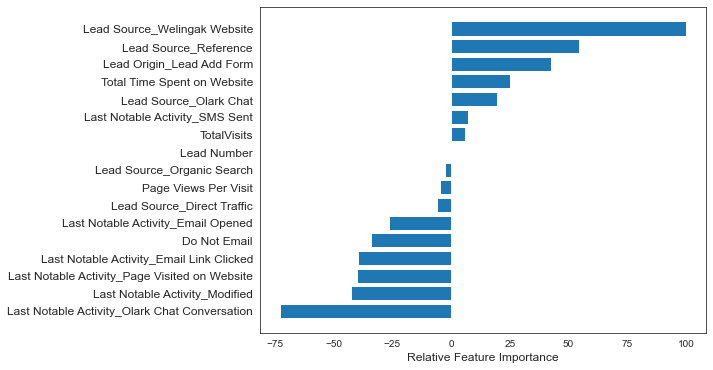

In [248]:
# To plot features with their relative importance
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_idx.shape[0])
ax.barh(pos, feature_importance[sorted_idx])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col3].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()

### Conclusion

In [ ]:
#All p-values are very close to zero.
#VIFs for all features are very low. There is hardly any multicollinearity present.
#The overall testing accuracy is around 80%.
# The optimal threshold for the model is 0.3 which is calculated based on tradeoff between sensitivity, specificity and accuracy. According to business needs, this threshold can be changed to increase or decrease a specific metric.